## RNN (Using Autoregressive Multiple-Step Approch)

* Predict future steps recursively using model’s previous output as input.

* Feedback loop is used where predictions become inputs for the next step. 

In [13]:
import pandas as pd
import numpy as np

# Load the training and testing datasets
train_data = pd.read_csv('training_1.csv')
test_data = pd.read_csv('testing_1.csv')

# Check the column names and structure
print("Training Data Columns:", train_data.columns)
print("Testing Data Columns:", test_data.columns)

# Normalize `IP Delay (ms)` in the training data if not already normalized
if 'Normalized IP Delay' not in train_data.columns:
    min_train = train_data['IP Delay (ms)'].min()
    max_train = train_data['IP Delay (ms)'].max()
    train_data['Normalized IP Delay'] = (train_data['IP Delay (ms)'] - min_train) / (max_train - min_train)

if 'Normalized IP Delay' not in test_data.columns:
    min_test = test_data['IP Delay (ms)'].min()
    max_test = test_data['IP Delay (ms)'].max()
    test_data['Normalized IP Delay'] = (test_data['IP Delay (ms)'] - min_test) / (max_test - min_test)

print("Training Data Head:\n", train_data.head())
print("Testing Data Head:\n", test_data.head())

Training Data Columns: Index(['SN', 'IP Delay (ms)'], dtype='object')
Testing Data Columns: Index(['SN', 'IP Delay (ms)'], dtype='object')
Training Data Head:
    SN  IP Delay (ms)  Normalized IP Delay
0   1      19.265890             0.609268
1   2      19.082069             0.572774
2   3      19.102097             0.576750
3   4      19.090891             0.574525
4   5      18.964052             0.549344
Testing Data Head:
    SN  IP Delay (ms)  Normalized IP Delay
0   1      16.572952             0.083876
1   2      16.433954             0.056573
2   3      16.265154             0.023416
3   4      16.330004             0.036154
4   5      21.164894             0.985857


In [3]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])  # Sequence of delays
        y.append(data[i+sequence_length])   # Target value (next step)
    return np.array(X), np.array(y)

# Define sequence length (number of previous steps to consider)
sequence_length = 10  # Adjust as needed

# Generate sequences for training data
train_values = train_data['Normalized IP Delay'].values
X_train, y_train = create_sequences(train_values, sequence_length)

# Reshape training input for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Add feature dimension

# Generate sequences for testing data
test_values = test_data['Normalized IP Delay'].values
X_test, y_test = create_sequences(test_values, sequence_length)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Display the shapes of training and testing datasets
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)


X_train Shape: (190, 10, 1)
y_train Shape: (190,)
X_test Shape: (540, 10, 1)
y_test Shape: (540,)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),  # RNN layer with 50 units
    Dense(1)  # Output layer for predicting one value
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Use Mean Squared Error as the loss function
model.summary()


c:\ML\PYTHON\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.3240 - val_loss: 0.0584
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1394 - val_loss: 0.0132
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0607 - val_loss: 0.0016
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0260 - val_loss: 0.0060
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0248 - val_loss: 0.0128
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0253 - val_loss: 0.0108
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0199 - val_loss: 0.0055
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0222 - val_loss: 0.0028
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - val_loss: 0.0017
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0201 - val_loss: 0.0018
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0218 - val_loss: 0.0025
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0205 - val_loss: 0.0030


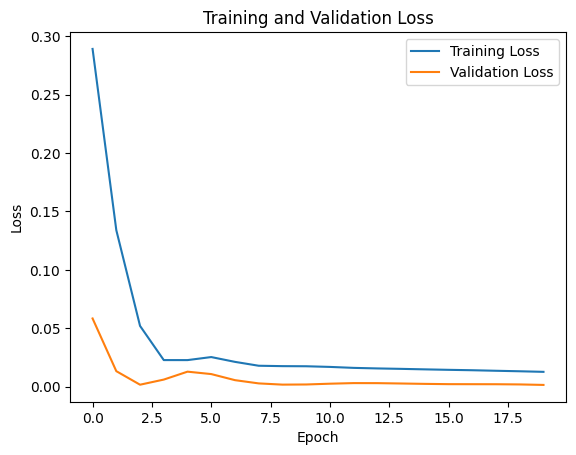

In [5]:
# Train the RNN model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
# Multi-step iterative prediction
def multi_step_prediction(initial_sequence, model, future_steps):
    current_sequence = initial_sequence
    predicted_delays = []

    for _ in range(future_steps):
        # Predict the next delay
        next_delay = model.predict(current_sequence.reshape(1, current_sequence.shape[0], 1))
        predicted_delays.append(next_delay.flatten()[0])  # Save prediction

        # Update the sequence: remove oldest value and append new prediction
        current_sequence = np.append(current_sequence[1:], next_delay).reshape(-1, 1)

    return predicted_delays

# Select the starting sequence (e.g., the first sequence in X_test)
starting_sequence = X_test[0]

# Number of future steps to predict
future_steps = 10

# Perform multi-step prediction
predicted_delays = multi_step_prediction(starting_sequence, model, future_steps)
print("Predicted delays for future steps:", predicted_delays)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted delays for future steps: [np.float32(0.94122034), np.float32(0.9179723), np.float32(0.88859004), np.float32(0.86718196), np.float32(0.84137654), np.float32(0.81681037), np.float32(0.7938678), np.float32(0.77305996), np.float32(0.75087535), np.float32(0.7312638)]


In [7]:
# Denormalize predictions
denormalized_predictions = (np.array(predicted_delays) * (test_data['IP Delay (ms)'].max() - test_data['IP Delay (ms)'].min())) + test_data['IP Delay (ms)'].min()
print("Denormalized Predicted Delays:", denormalized_predictions)


Denormalized Predicted Delays: [20.93765211 20.81929757 20.66971375 20.56072624 20.42935212 20.30428691
 20.18748753 20.0815557  19.96861492 19.86877352]


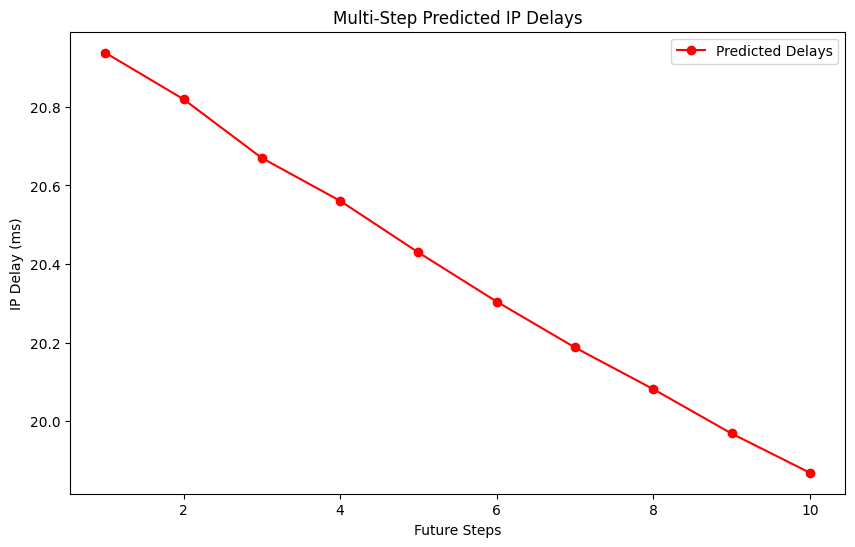

In [8]:
import matplotlib.pyplot as plt

# Plot predicted delays
plt.figure(figsize=(10, 6))
plt.plot(range(1, future_steps + 1), denormalized_predictions, marker='o', label='Predicted Delays', color='red')
plt.title('Multi-Step Predicted IP Delays')
plt.xlabel('Future Steps')
plt.ylabel('IP Delay (ms)')
plt.legend()
plt.show()


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
      SN  Actual IP Delay (ms)  Predicted IP Delay (ms)  \
99   100             19.318819                19.342652   
100  101             19.319057                19.278062   
101  102             19.184828                19.210595   
102  103             19.212008                19.152502   
103  104             19.086123                19.096490   
..   ...                   ...                      ...   
195  196             18.313169                18.436492   
196  197             18.329859                18.368367   
197  198             18.321037                18.315236   
198  199             18.179893                18.327970   
199  200             18.197060                18.227830   

     Absolute Difference (ms)  
99                   0.023833  
100                  0.040995  
101                  0.025768  
102                  0.059506  
103                  0.010367  
..                        ...  
195                  0.1233

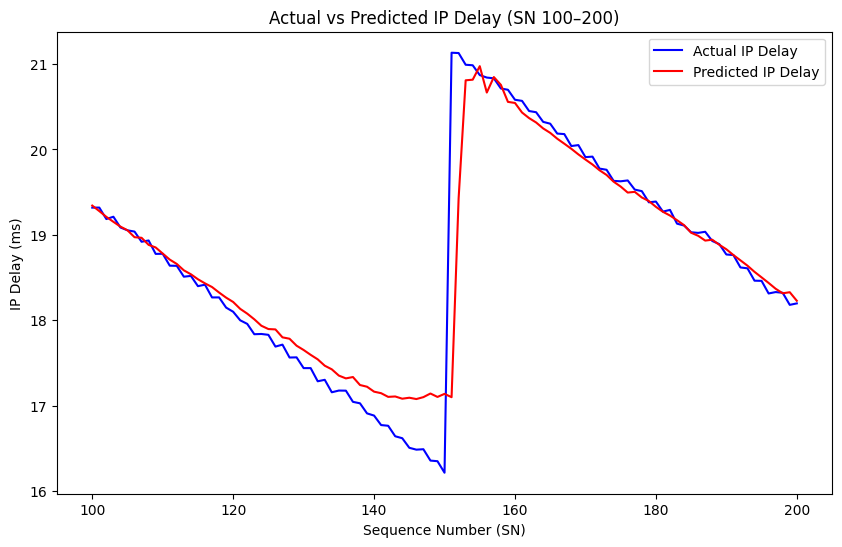

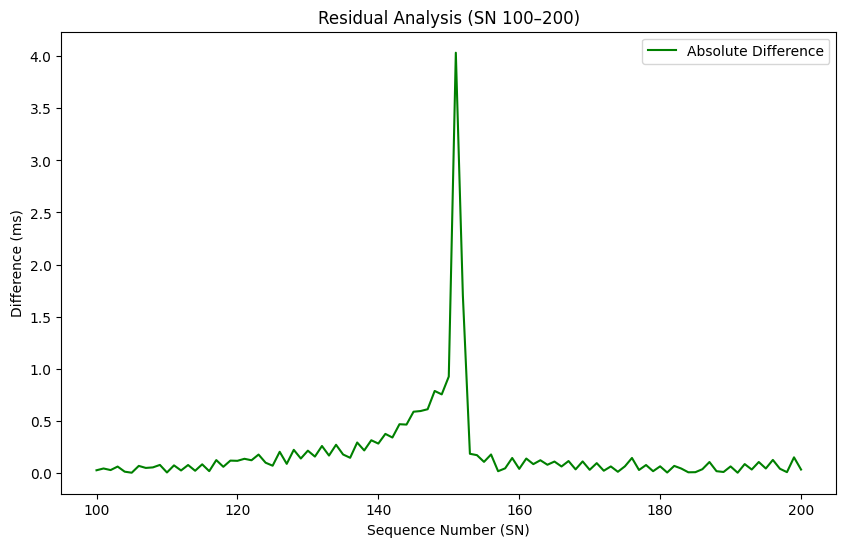

In [11]:
# Predict for all sequences in testing data
predictions = model.predict(X_test)

# Denormalize predictions
min_test = test_data['IP Delay (ms)'].min()
max_test = test_data['IP Delay (ms)'].max()
denormalized_predictions = (predictions.flatten() * (max_test - min_test)) + min_test

# Extract actual values and denormalize them
denormalized_actual = (y_test * (max_test - min_test)) + min_test

# Create a comparison table
comparison_df = pd.DataFrame({
    'SN': range(1, len(denormalized_actual) + 1),
    'Actual IP Delay (ms)': denormalized_actual,
    'Predicted IP Delay (ms)': denormalized_predictions,
    'Absolute Difference (ms)': abs(denormalized_actual - denormalized_predictions)
})

# Filter comparison_df for SN 100 to 200
filtered_df = comparison_df[(comparison_df['SN'] >= 100) & (comparison_df['SN'] <= 200)]

# Print filtered comparison
print(filtered_df)

# Optional: Save the comparison table to a CSV file
comparison_df.to_csv('comparison_results.csv', index=False)

# Plot Actual vs Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['SN'], filtered_df['Actual IP Delay (ms)'], label='Actual IP Delay', color='blue')
plt.plot(filtered_df['SN'], filtered_df['Predicted IP Delay (ms)'], label='Predicted IP Delay', color='red')
plt.xlabel('Sequence Number (SN)')
plt.ylabel('IP Delay (ms)')
plt.title('Actual vs Predicted IP Delay (SN 100–200)')
plt.legend()
plt.show()

# Plot Residuals (Absolute Difference)
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['SN'], filtered_df['Absolute Difference (ms)'], label='Absolute Difference', color='green')
plt.xlabel('Sequence Number (SN)')
plt.ylabel('Difference (ms)')
plt.title('Residual Analysis (SN 100–200)')
plt.legend()
plt.show()


Residual Statistical Summary (SN 100–200):
 count    101.000000
mean       0.194789
std        0.450980
min        0.000280
25%        0.037341
50%        0.083147
75%        0.168995
max        4.034217
Name: Absolute Difference (ms), dtype: float64


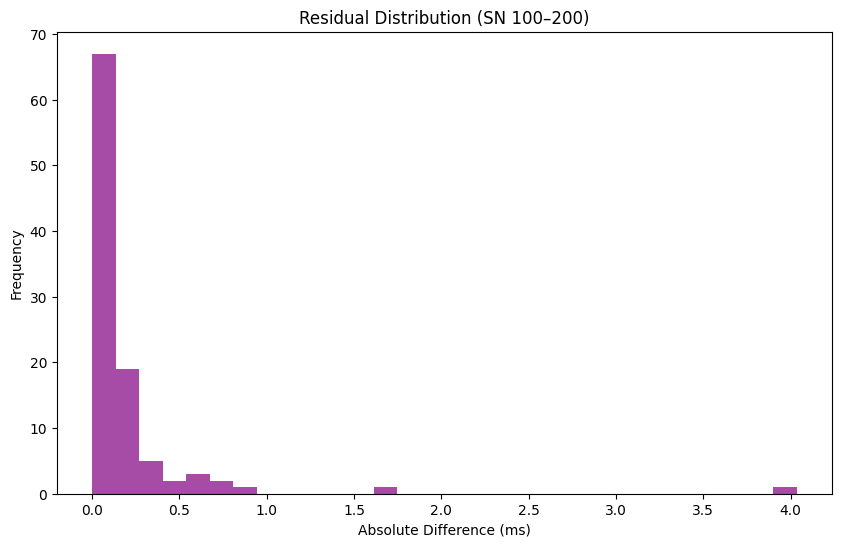

In [12]:
# Print residual stats for filtered range
residual_stats_filtered = filtered_df['Absolute Difference (ms)'].describe()
print("Residual Statistical Summary (SN 100–200):\n", residual_stats_filtered)

# Histogram of residuals for SN 100–200
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Absolute Difference (ms)'], bins=30, color='purple', alpha=0.7)
plt.xlabel('Absolute Difference (ms)')
plt.ylabel('Frequency')
plt.title('Residual Distribution (SN 100–200)')
plt.show()
